In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [40]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Cek Dataset
df = pd.read_csv('/content/drive/My Drive/Bengkel Koding/Telco-Customer-Churn.csv')

# Baca dataset
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [42]:
# Cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
# Memeriksa ringkasan statistik
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


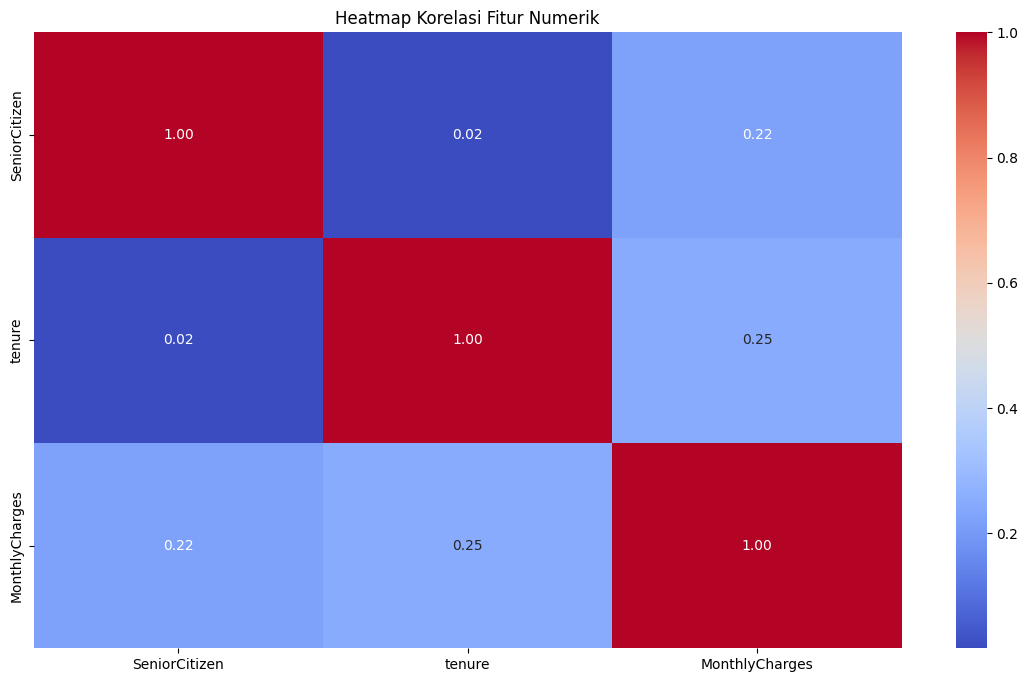

In [44]:
# heatmap korelasi
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

In [45]:
# Buang data yang targetnya kosong
df = df.dropna(subset=['Churn']).reset_index(drop=True)

# Ubah target jadi biner: No=1, Yes=0
df['Churn_bin'] = df['Churn'].map({'Yes':1, 'No':0})

# Tentukan fitur dan target
X_direct = df.drop(columns=['customerID', 'Churn', 'Churn_bin'])
y_direct = df['Churn_bin']

# Pisahkan fitur numerik dan kategorikal
num_cols = X_direct.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_direct.select_dtypes(include=['object']).columns.tolist()

print("Jumlah fitur numerik:", len(num_cols))
print("Jumlah fitur kategorikal:", len(cat_cols))
print("\nContoh fitur numerik:", num_cols[:5])
print("Contoh fitur kategorikal:", cat_cols[:5])

Jumlah fitur numerik: 3
Jumlah fitur kategorikal: 16

Contoh fitur numerik: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Contoh fitur kategorikal: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines']


In [46]:
# Label encode semua kolom object
for col in X_direct.select_dtypes(include="object"):
    X_direct[col] = LabelEncoder().fit_transform(X_direct[col])

In [47]:
# Split Data 80:20
X_train_direct, X_test_direct, y_train_direct, y_test_direct = train_test_split(X_direct, y_direct, test_size=0.2,
                                                    random_state=42, stratify=y_direct)

print("Train shape:", X_train_direct.shape)
print("Test shape :", X_test_direct.shape)


Train shape: (5634, 19)
Test shape : (1409, 19)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


===== Evaluasi Model: Logistic Regression =====
Akurasi : 0.7970191625266146
Presisi : 0.787572630093222
Recall  : 0.7970191625266146
F1 Score: 0.7900980666183781

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



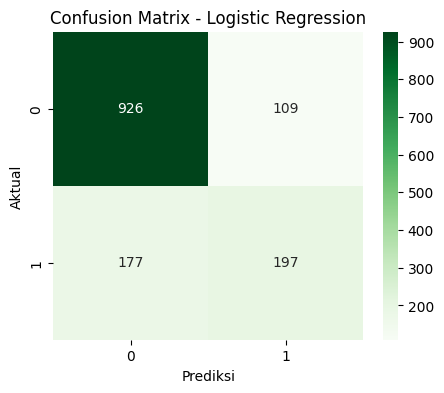

In [48]:
lr_model_direct = LogisticRegression(max_iter=1000, random_state=42)
lr_model_direct.fit(X_train_direct, y_train_direct)

y_pred_lr_direct = lr_model_direct.predict(X_test_direct)

print("===== Evaluasi Model: Logistic Regression =====")
print("Akurasi :", accuracy_score(y_test_direct, y_pred_lr_direct))
print("Presisi :", precision_score(y_test_direct, y_pred_lr_direct, average='weighted'))
print("Recall  :", recall_score(y_test_direct, y_pred_lr_direct, average='weighted'))
print("F1 Score:", f1_score(y_test_direct, y_pred_lr_direct, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test_direct, y_pred_lr_direct))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_direct, y_pred_lr_direct), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

===== Evaluasi Model: Random Forest =====
Akurasi : 0.7877927608232789
Presisi : 0.7757990350149997
Recall  : 0.7877927608232789
F1 Score: 0.7783747942324148

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



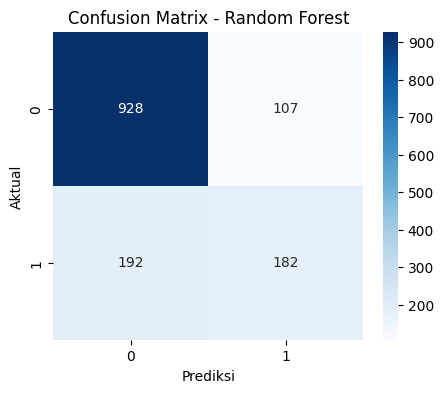

In [49]:
rf_model_direct = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model_direct.fit(X_train_direct, y_train_direct)

y_pred_rf_direct = rf_model_direct.predict(X_test_direct)

print("===== Evaluasi Model: Random Forest =====")
print("Akurasi :", accuracy_score(y_test_direct, y_pred_rf_direct))
print("Presisi :", precision_score(y_test_direct, y_pred_rf_direct, average='weighted'))
print("Recall  :", recall_score(y_test_direct, y_pred_rf_direct, average='weighted'))
print("F1 Score:", f1_score(y_test_direct, y_pred_rf_direct, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test_direct, y_pred_rf_direct))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_direct, y_pred_rf_direct), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


===== Evaluasi Model: Voting Classifier (LR + KNN + SVM) =====
Akurasi : 0.7799858055358411
Presisi : 0.7626618338708125
Recall  : 0.7799858055358411
F1 Score: 0.7555759023259351

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1035
           1       0.66      0.36      0.46       374

    accuracy                           0.78      1409
   macro avg       0.73      0.64      0.66      1409
weighted avg       0.76      0.78      0.76      1409



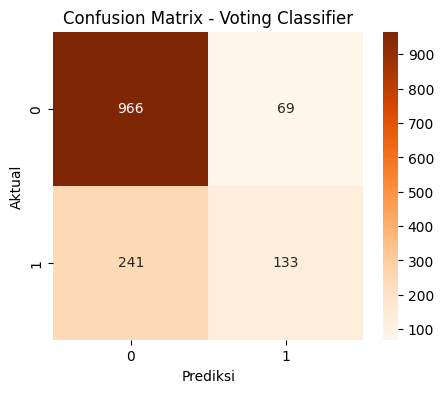

In [50]:
voting_model_direct = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('knn', KNeighborsClassifier()),
        ('svm', SVC(probability=True))
    ],
    voting='soft'
)

voting_model_direct.fit(X_train_direct, y_train_direct)
y_pred_vote_direct = voting_model_direct.predict(X_test_direct)

print("===== Evaluasi Model: Voting Classifier (LR + KNN + SVM) =====")
print("Akurasi :", accuracy_score(y_test_direct, y_pred_vote_direct))
print("Presisi :", precision_score(y_test_direct, y_pred_vote_direct, average='weighted'))
print("Recall  :", recall_score(y_test_direct, y_pred_vote_direct, average='weighted'))
print("F1 Score:", f1_score(y_test_direct, y_pred_vote_direct, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test_direct, y_pred_vote_direct))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_direct, y_pred_vote_direct), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

,Model,Accuracy,F1_Score
0,Logistic Regression,0.797019,0.790098
1,Random Forest,0.787793,0.778375
2,Voting Classifier,0.779986,0.755576


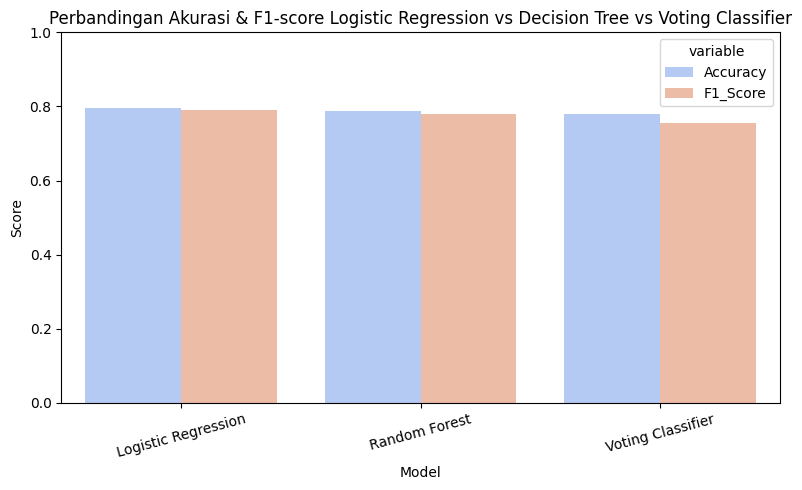

In [51]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Voting Classifier'],
    'Accuracy': [
        accuracy_score(y_test_direct, y_pred_lr_direct),
        accuracy_score(y_test_direct, y_pred_rf_direct),
        accuracy_score(y_test_direct, y_pred_vote_direct)
    ],
    'F1_Score': [
        f1_score(y_test_direct, y_pred_lr_direct, average='weighted'),
        f1_score(y_test_direct, y_pred_rf_direct, average='weighted'),
        f1_score(y_test_direct, y_pred_vote_direct, average='weighted')
    ]
})

display(results)

plt.figure(figsize=(8,5))
sns.barplot(
    data=results.melt(id_vars='Model', value_vars=['Accuracy', 'F1_Score']),
    x='Model', y='value', hue='variable', palette='coolwarm'
)
plt.title('Perbandingan Akurasi & F1-score Logistic Regression vs Decision Tree vs Voting Classifier')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [52]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df = df.drop(columns=['customerID'])

# Buang data yang targetnya kosong
df = df.dropna(subset=['Churn']).reset_index(drop=True)

# Ubah target jadi biner: No=1, Yes=0
df['Churn_bin'] = df['Churn'].map({'Yes':1, 'No':0})

X = df.drop(columns=['Churn', 'Churn_bin'])
y = df['Churn_bin']

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

print("Jumlah fitur numerik:", len(num_cols))
print("Jumlah fitur kategorikal:", len(cat_cols))
print("\nContoh fitur numerik:", num_cols[:5])
print("Contoh fitur kategorikal:", cat_cols[:5])


Jumlah fitur numerik: 3
Jumlah fitur kategorikal: 16

Contoh fitur numerik: ['tenure', 'MonthlyCharges', 'TotalCharges']
Contoh fitur kategorikal: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService']


In [53]:
# Cek missing value
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [54]:
# Filter kolom dengan tipe data 'object' (yang biasanya berisi teks)
object_cols = df.select_dtypes(include='object').columns

# Hitung persentase missing value untuk kolom-kolom object
missing_object_percentage = df[object_cols].isnull().sum() / len(df) * 100
missing_object_percentage = missing_object_percentage.sort_values(ascending=False)

print("Persentase Missing Value untuk Kolom Teks (Object) :\n", missing_object_percentage)

Persentase Missing Value untuk Kolom Teks (Object) :
 gender              0.0
Partner             0.0
Dependents          0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
Churn               0.0
dtype: float64


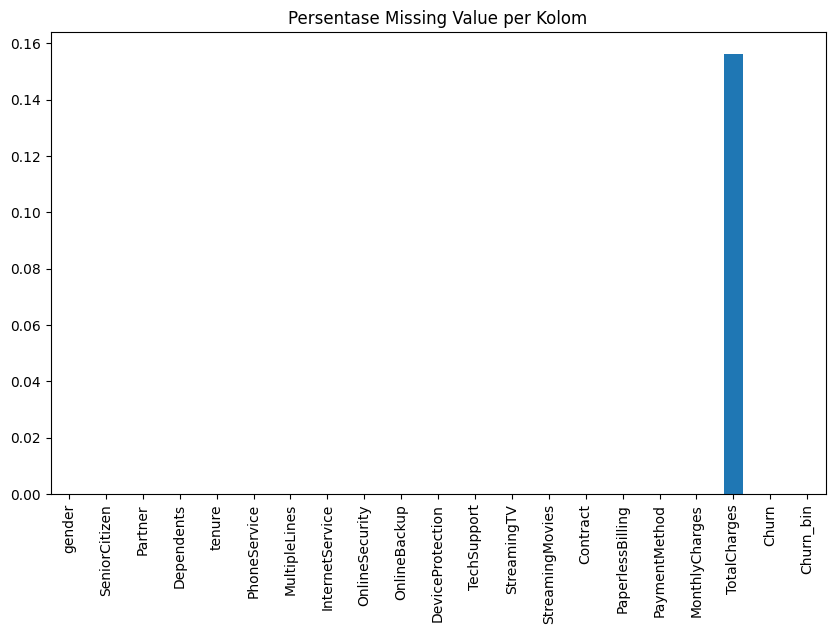

In [55]:
# Hitung jumlah dan persentase missing value untuk setiap kolom
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Visualisasi dalam bentuk diagram batang
plt.figure(figsize=(10,6))
missing_percent.plot(kind='bar')
plt.title('Persentase Missing Value per Kolom')
plt.show()

In [56]:
# cek apakah sudah bersih
print(df.isnull().sum().sum(), "missing value tersisa")
df.isnull().sum()

11 missing value tersisa


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


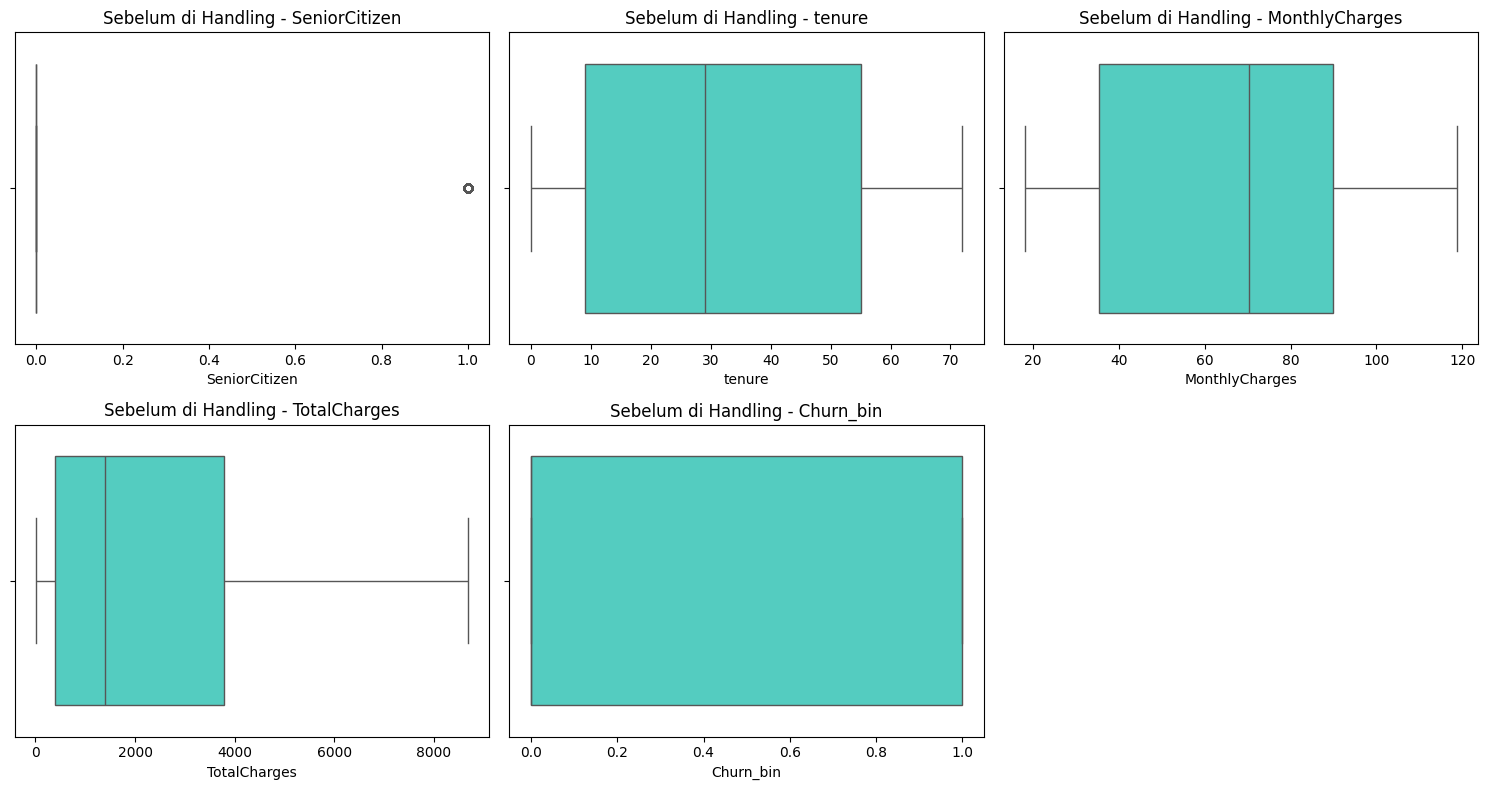

In [57]:
# Cek outlier
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Tampilkan boxplot awal (sebelum penanganan)
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols)//3)+1, 3, i+1)
    sns.boxplot(x=df[col], color='turquoise')
    plt.title(f"Sebelum di Handling - {col}")
plt.tight_layout()
plt.show()

In [58]:
# Imputasi missing value
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [59]:
# One-hot encoding untuk fitur kategorikal
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cat = pd.DataFrame(encoder.fit_transform(df[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))

# Simpan nama kolom hasil encoding
encoded_cat.columns = encoder.get_feature_names_out(cat_cols)

# Gabungkan hasil encoding ke fitur numerik
df_encoded = pd.concat([df[num_cols].reset_index(drop=True), encoded_cat], axis=1)

# Tambahkan kolom target
df_encoded['Churn_bin'] = df['Churn_bin'].values

In [60]:
# Split Data 80:20

X = df_encoded.drop('Churn_bin', axis=1)
y = df_encoded['Churn_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (5634, 47)
Test shape : (1409, 47)


In [61]:
# Tentukan ulang fitur numerik HANYA dari X
num_cols = X.select_dtypes(include='number').columns.tolist()

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols]  = scaler.transform(X_test[num_cols])

===== Evaluasi Model: Logistic Regression =====
Akurasi : 0.8069552874378992
Presisi : 0.7998479736365651
Recall  : 0.8069552874378992
F1 Score: 0.8021091451064993

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



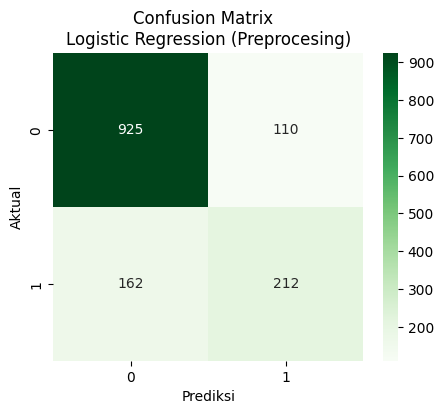

In [62]:
lr_model_pre = LogisticRegression(max_iter=1000, random_state=42)
lr_model_pre.fit(X_train_scaled, y_train)

y_pred_lr_pre = lr_model_pre.predict(X_test_scaled)

print("===== Evaluasi Model: Logistic Regression =====")
print("Akurasi :", accuracy_score(y_test, y_pred_lr_pre))
print("Presisi :", precision_score(y_test, y_pred_lr_pre, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_lr_pre, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr_pre, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_pre))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_pre), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix  \nLogistic Regression (Preprocesing)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

===== Evaluasi Model: Random Forest =====
Akurasi : 0.7806955287437899
Presisi : 0.7690739154620414
Recall  : 0.7806955287437899
F1 Score: 0.7723097344792729

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



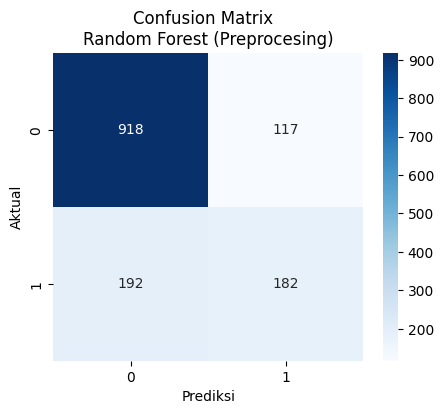

In [63]:
rf_model_pre = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model_pre.fit(X_train_scaled, y_train)

y_pred_rf_pre = rf_model_pre.predict(X_test_scaled)

print("===== Evaluasi Model: Random Forest =====")
print("Akurasi :", accuracy_score(y_test, y_pred_rf_pre))
print("Presisi :", precision_score(y_test, y_pred_rf_pre, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_rf_pre, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf_pre, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_pre))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_pre), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix  \nRandom Forest (Preprocesing)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

===== Evaluasi Model: Voting Classifier (LR + KNN + SVM) =====
Akurasi : 0.7849538679914834
Presisi : 0.7746595375448662
Recall  : 0.7849538679914834
F1 Score: 0.777746342562071

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



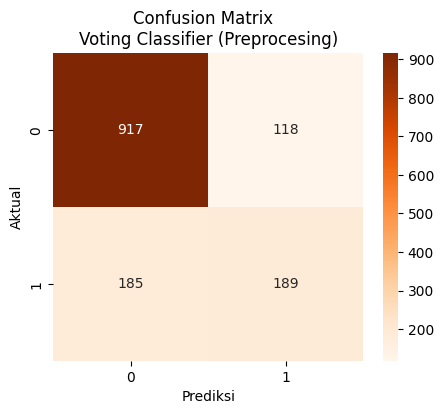

In [64]:
voting_model_pre = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('knn', KNeighborsClassifier()),
        ('svm', SVC(probability=True))
    ],
    voting='soft'
)

voting_model_pre.fit(X_train_scaled, y_train)
y_pred_vote_pre = voting_model_pre.predict(X_test_scaled)

print("===== Evaluasi Model: Voting Classifier (LR + KNN + SVM) =====")
print("Akurasi :", accuracy_score(y_test, y_pred_vote_pre))
print("Presisi :", precision_score(y_test, y_pred_vote_pre, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_vote_pre, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_vote_pre, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_vote_pre))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_vote_pre), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix  \nVoting Classifier (Preprocesing)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

,Model,Accuracy,F1_Score
0,Logistic Regression,0.806955,0.802109
1,Random Forest,0.780696,0.772310
2,Voting Classifier,0.784954,0.777746


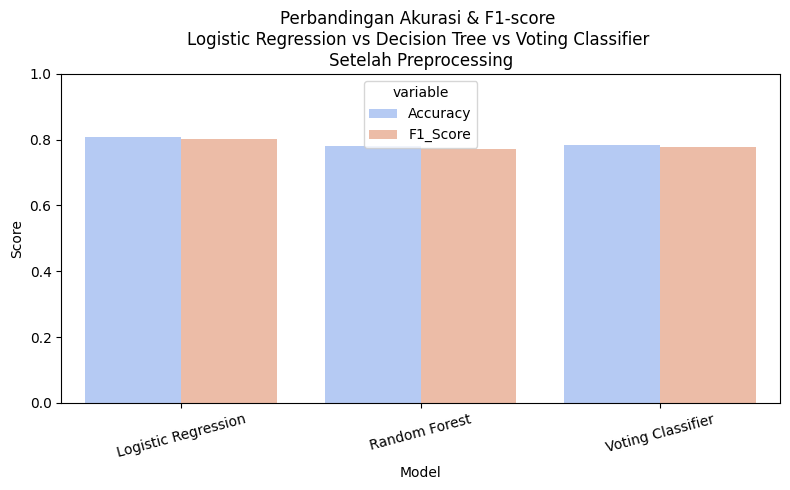

In [65]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Voting Classifier'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr_pre),
        accuracy_score(y_test, y_pred_rf_pre),
        accuracy_score(y_test, y_pred_vote_pre)
    ],
    'F1_Score': [
        f1_score(y_test, y_pred_lr_pre, average='weighted'),
        f1_score(y_test, y_pred_rf_pre, average='weighted'),
        f1_score(y_test, y_pred_vote_pre, average='weighted')
    ]
})

display(results)

plt.figure(figsize=(8,5))
sns.barplot(
    data=results.melt(id_vars='Model', value_vars=['Accuracy', 'F1_Score']),
    x='Model', y='value', hue='variable', palette='coolwarm'
)
plt.title('Perbandingan Akurasi & F1-score \nLogistic Regression vs Decision Tree vs Voting Classifier \nSetelah Preprocessing')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

,Model,Accuracy,F1_Score
0,Logistic Regression,0.797019,0.790098
1,Logistic Regression (Prep),0.806955,0.802109
2,Random Forest,0.787793,0.778375
3,Random Forest (Prep),0.780696,0.772310
4,Voting Classifier,0.779986,0.755576
5,Voting Classifier (Prep),0.784954,0.777746


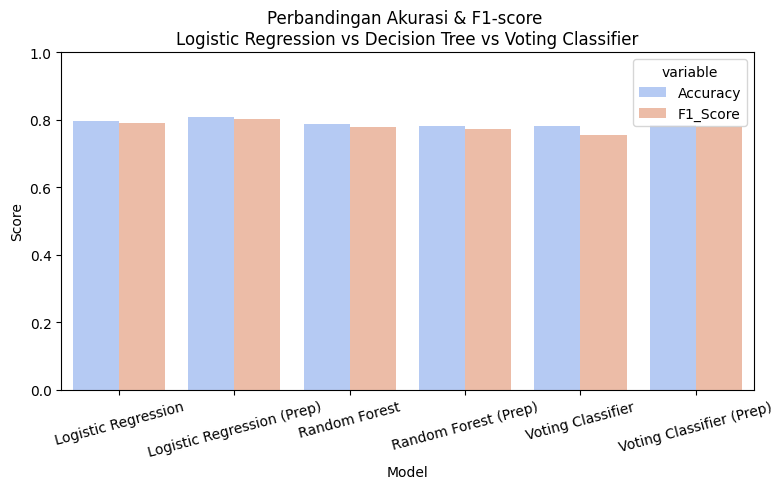

In [66]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression (Prep)', 'Random Forest', 'Random Forest (Prep)',
              'Voting Classifier', 'Voting Classifier (Prep)'],
    'Accuracy': [
        accuracy_score(y_test_direct, y_pred_lr_direct),
        accuracy_score(y_test, y_pred_lr_pre),
        accuracy_score(y_test_direct, y_pred_rf_direct),
        accuracy_score(y_test, y_pred_rf_pre),
        accuracy_score(y_test_direct, y_pred_vote_direct),
        accuracy_score(y_test, y_pred_vote_pre)
    ],
    'F1_Score': [
        f1_score(y_test_direct, y_pred_lr_direct, average='weighted'),
        f1_score(y_test, y_pred_lr_pre, average='weighted'),
        f1_score(y_test_direct, y_pred_rf_direct, average='weighted'),
        f1_score(y_test, y_pred_rf_pre, average='weighted'),
        f1_score(y_test_direct, y_pred_vote_direct, average='weighted'),
        f1_score(y_test, y_pred_vote_pre, average='weighted')
    ]
})

display(results)

plt.figure(figsize=(8,5))
sns.barplot(
    data=results.melt(id_vars='Model', value_vars=['Accuracy', 'F1_Score']),
    x='Model', y='value', hue='variable', palette='coolwarm'
)
plt.title('Perbandingan Akurasi & F1-score \nLogistic Regression vs Decision Tree vs Voting Classifier')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

===== Logistic Regression (Best Params) =====
LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='liblinear')

--- Evaluasi Logistic Regression ---
Accuracy : 0.794889992902768
Precision: 0.6261127596439169
Recall   : 0.5641711229946524
F1-Score : 0.5935302390998594


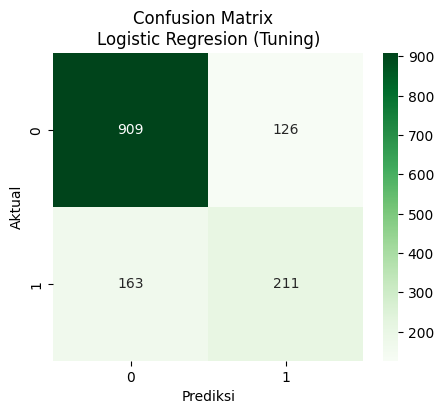

In [71]:
# ============================================
# 1. Logistic Regression — RandomizedSearch
# ============================================
lr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

param_lr = {
    'C': [0.01, 0.1, 1, 10, 100]
}

rand_lr = RandomizedSearchCV(
    lr, param_lr,
    n_iter=5,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_lr.fit(X_train_scaled, y_train)
best_lr = rand_lr.best_estimator_

print("===== Logistic Regression (Best Params) =====")
print(best_lr)

# Evaluasi
y_pred_lr = best_lr.predict(X_test_scaled)

print("\n--- Evaluasi Logistic Regression ---")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1-Score :", f1_score(y_test, y_pred_lr))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix  \nLogistic Regresion (Tuning)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


===== Random Forest (Best Params) =====
RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=250, random_state=42)

--- Evaluasi Random Forest ---
Accuracy : 0.801277501774308
Precision: 0.6643356643356644
Recall   : 0.5080213903743316
F1-Score : 0.5757575757575758


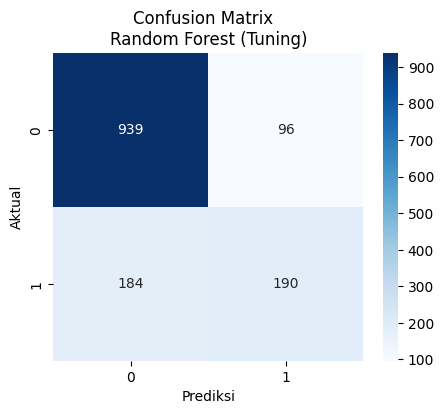

In [72]:
# ============================================
# 2. Random Forest — RandomizedSearch
# ============================================
rf = RandomForestClassifier(random_state=42)

param_rf = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

rand_rf = RandomizedSearchCV(
    rf, param_rf,
    n_iter=15,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_rf.fit(X_train_scaled, y_train)
best_rf = rand_rf.best_estimator_

print("===== Random Forest (Best Params) =====")
print(best_rf)

# Evaluasi
y_pred_rf = best_rf.predict(X_test_scaled)

print("\n--- Evaluasi Random Forest ---")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-Score :", f1_score(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix  \nRandom Forest (Tuning)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()



===== Evaluasi Voting Classifier =====
Accuracy : 0.7877927608232789
Precision: 0.616822429906542
Recall   : 0.5294117647058824
F1-Score : 0.5697841726618705


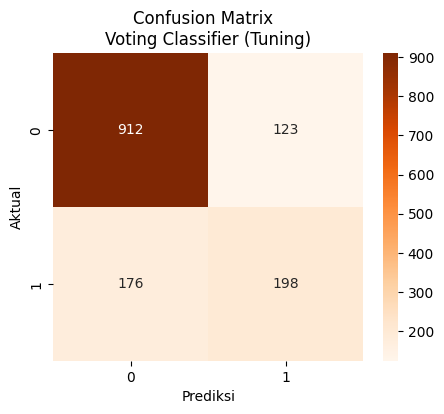

In [69]:
# =====================================================
# 1. Tuning Logistic Regression (untuk Voting)
# =====================================================
lr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

param_lr = {
    'C': [0.01, 0.1, 1, 10, 100]
}

rand_lr = RandomizedSearchCV(
    lr, param_lr,
    n_iter=5,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_lr.fit(X_train_scaled, y_train)
best_lr = rand_lr.best_estimator_


# =====================================================
# 2. Tuning KNN (untuk Voting)
# =====================================================
knn = KNeighborsClassifier()

param_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

rand_knn = RandomizedSearchCV(
    knn, param_knn,
    n_iter=8,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_knn.fit(X_train_scaled, y_train)
best_knn = rand_knn.best_estimator_


# =====================================================
# 3. Tuning SVM (linear agar cepat)
# =====================================================
svm = SVC(probability=True, random_state=42)

param_svm = {
    'C': [0.1, 0.5, 1, 3, 5],
    'kernel': ['linear']   # hanya linear → cepat
}

rand_svm = RandomizedSearchCV(
    svm, param_svm,
    n_iter=5,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_svm.fit(X_train_scaled, y_train)
best_svm = rand_svm.best_estimator_


# =====================================================
# 4. Membangun Voting Classifier (SOFT VOTING)
# =====================================================
voting = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('knn', best_knn),
        ('svm', best_svm)
    ],
    voting='soft'
)

voting.fit(X_train_scaled, y_train)
best_voting = voting


# =====================================================
# 5. Evaluasi Voting Classifier
# =====================================================
y_pred_vote = best_voting.predict(X_test_scaled)

accuracy_vote = accuracy_score(y_test, y_pred_vote)
precision_vote = precision_score(y_test, y_pred_vote)
recall_vote = recall_score(y_test, y_pred_vote)
f1_vote = f1_score(y_test, y_pred_vote)

print("\n===== Evaluasi Voting Classifier =====")
print("Accuracy :", accuracy_vote)
print("Precision:", precision_vote)
print("Recall   :", recall_vote)
print("F1-Score :", f1_vote)


# =====================================================
# 6. Confusion Matrix Voting Classifier
# =====================================================
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_vote), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix  \nVoting Classifier (Tuning)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


,Model,Accuracy,F1_Score
0,Logistic Regression (Prep),0.806955,0.802109
1,Logistic Regression (Tuning),0.794890,0.791354
2,Random Forest (Prep),0.780696,0.772310
3,Random Forest (Tuning),0.801278,0.792081
4,Voting Classifier (Prep),0.784954,0.777746
5,Voting Classifier (Tuning),0.787793,0.782350


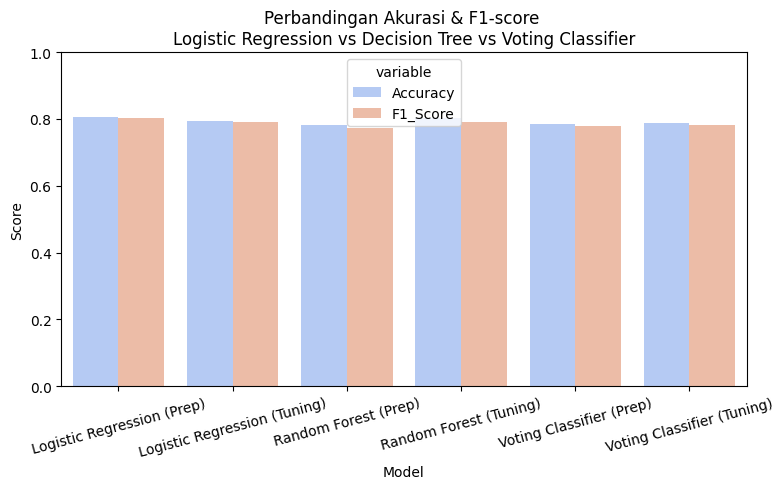

In [73]:
results = pd.DataFrame({
    'Model': ['Logistic Regression (Prep)', 'Logistic Regression (Tuning)', 'Random Forest (Prep)', 'Random Forest (Tuning)',
              'Voting Classifier (Prep)', 'Voting Classifier (Tuning)'],
    'Accuracy': [
        accuracy_score(y_test_direct, y_pred_lr_pre),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test_direct, y_pred_rf_pre),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test_direct, y_pred_vote_pre),
        accuracy_score(y_test, y_pred_vote)
    ],
    'F1_Score': [
        f1_score(y_test_direct, y_pred_lr_pre, average='weighted'),
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test_direct, y_pred_rf_pre, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test_direct, y_pred_vote_pre, average='weighted'),
        f1_score(y_test, y_pred_vote, average='weighted')
    ]
})

display(results)

plt.figure(figsize=(8,5))
sns.barplot(
    data=results.melt(id_vars='Model', value_vars=['Accuracy', 'F1_Score']),
    x='Model', y='value', hue='variable', palette='coolwarm'
)
plt.title('Perbandingan Akurasi & F1-score \nLogistic Regression vs Decision Tree vs Voting Classifier')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()